## NLP Topic Modeling Exercise

In [1]:
# import TfidfVectorizer and CountVectorizer from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# import fetch_20newsgroups from sklearn.datasets
from sklearn.datasets import fetch_20newsgroups

# import NMF and LatentDirichletAllocation from sklearn
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [2]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

* create a variable called `'no_features'` and set its value to 100.

In [3]:
no_features = 100

* create a variable `'no_topics'` and set its value to 100

In [4]:
no_topics = 100 # should be 10.. typo?

## NMF

* instantiate a TfidfVectorizer with the following parameters:


    * max_df = 0.95
    * min_df = 2
    * max_features = no_features
    * stop_words = 'english'

In [7]:
ti_vectorizer = TfidfVectorizer(
    max_df=0.95,
    min_df=2,
    max_features=no_features,
    stop_words='english'
)

* use fit_transform method of TfidfVectorizer to transform the documents

In [10]:
docs = ti_vectorizer.fit_transform(documents)

* get the features names from TfidfVectorizer

In [33]:
ti_feats = ti_vectorizer.get_feature_names_out()

* instantiate NMF and fit transformed data

In [39]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=10)

In [40]:
nmf_docs = nmf.fit_transform(docs)

## LDA w/ Sklearn

* instantiate a CountVectorizer with following parameters:


    * max_df = 0.95
    * min_df = 2
    * max_features = no_features
    * stop_words = 'english'

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
cvect = CountVectorizer(
    max_df=0.95,
    min_df=2, 
    max_features=no_features,
    stop_words='english'
)

* use fit_transform method of CountVectorizer to transform documents

In [26]:
cvect_data = cvect.fit_transform(documents)

In [27]:
type(cvect_data)

scipy.sparse._csr.csr_matrix

* get the features names from TfidfVectorizer

In [29]:
cvect_feats = cvect.get_feature_names_out()

* instantiate LatentDirichletAllocation and fit transformed data 

In [42]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10,
                                learning_method='online',
                                random_state=15)

In [43]:
lda.fit_transform(cvect_data)

array([[0.01      , 0.18004729, 0.01000087, ..., 0.01000767, 0.01      ,
        0.01000205],
       [0.01111111, 0.3783245 , 0.01111245, ..., 0.01111315, 0.01111111,
        0.0111119 ],
       [0.01111111, 0.0111129 , 0.01111152, ..., 0.01111305, 0.01111111,
        0.01111149],
       ...,
       [0.03333333, 0.03334059, 0.03333472, ..., 0.03333342, 0.03333333,
        0.03333431],
       [0.02      , 0.02000084, 0.59182294, ..., 0.02000037, 0.02      ,
        0.02000384],
       [0.00400003, 0.31989839, 0.07398568, ..., 0.00400064, 0.004     ,
        0.00400125]])

* create a function `display_topics` that is able to display the top words in a topic for different models

In [31]:
import matplotlib.pyplot as plt

In [32]:
def display_topics(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)

* display top 10 words from each topic from NMF model

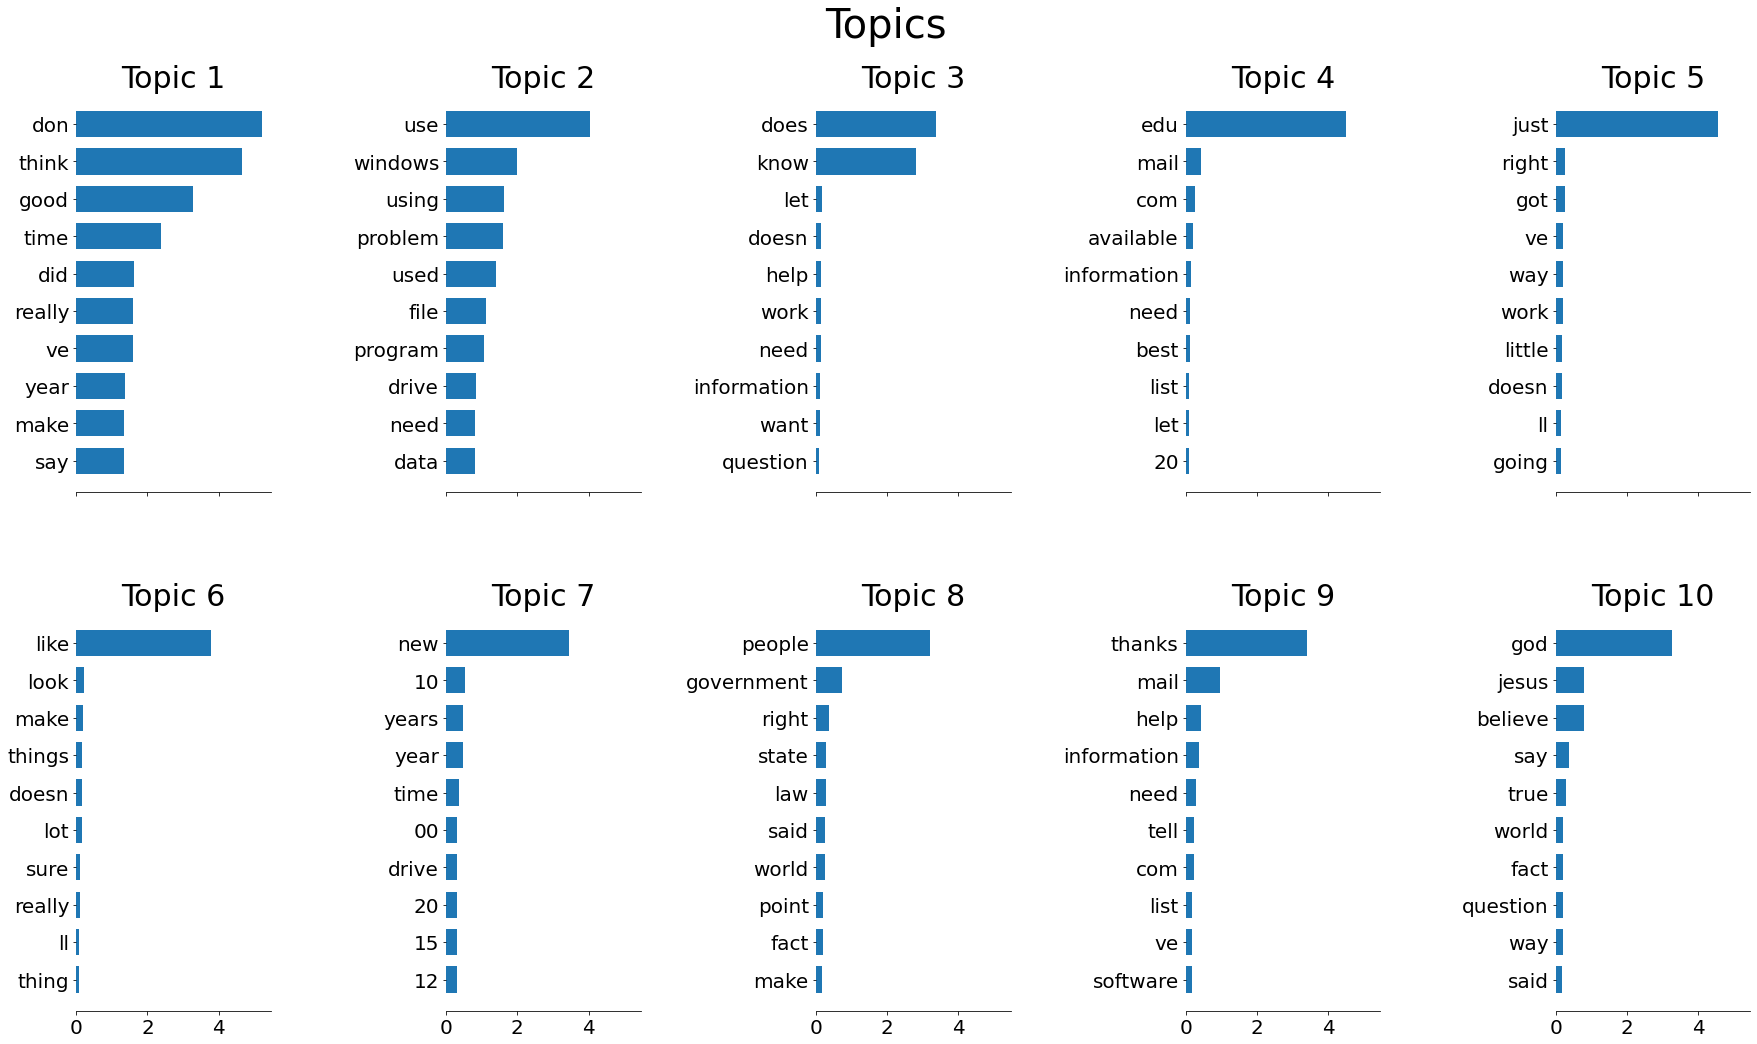

In [41]:
display_topics(nmf, feat_names, 10, 'Topics')

* display top 10 words from each topic from LDA model

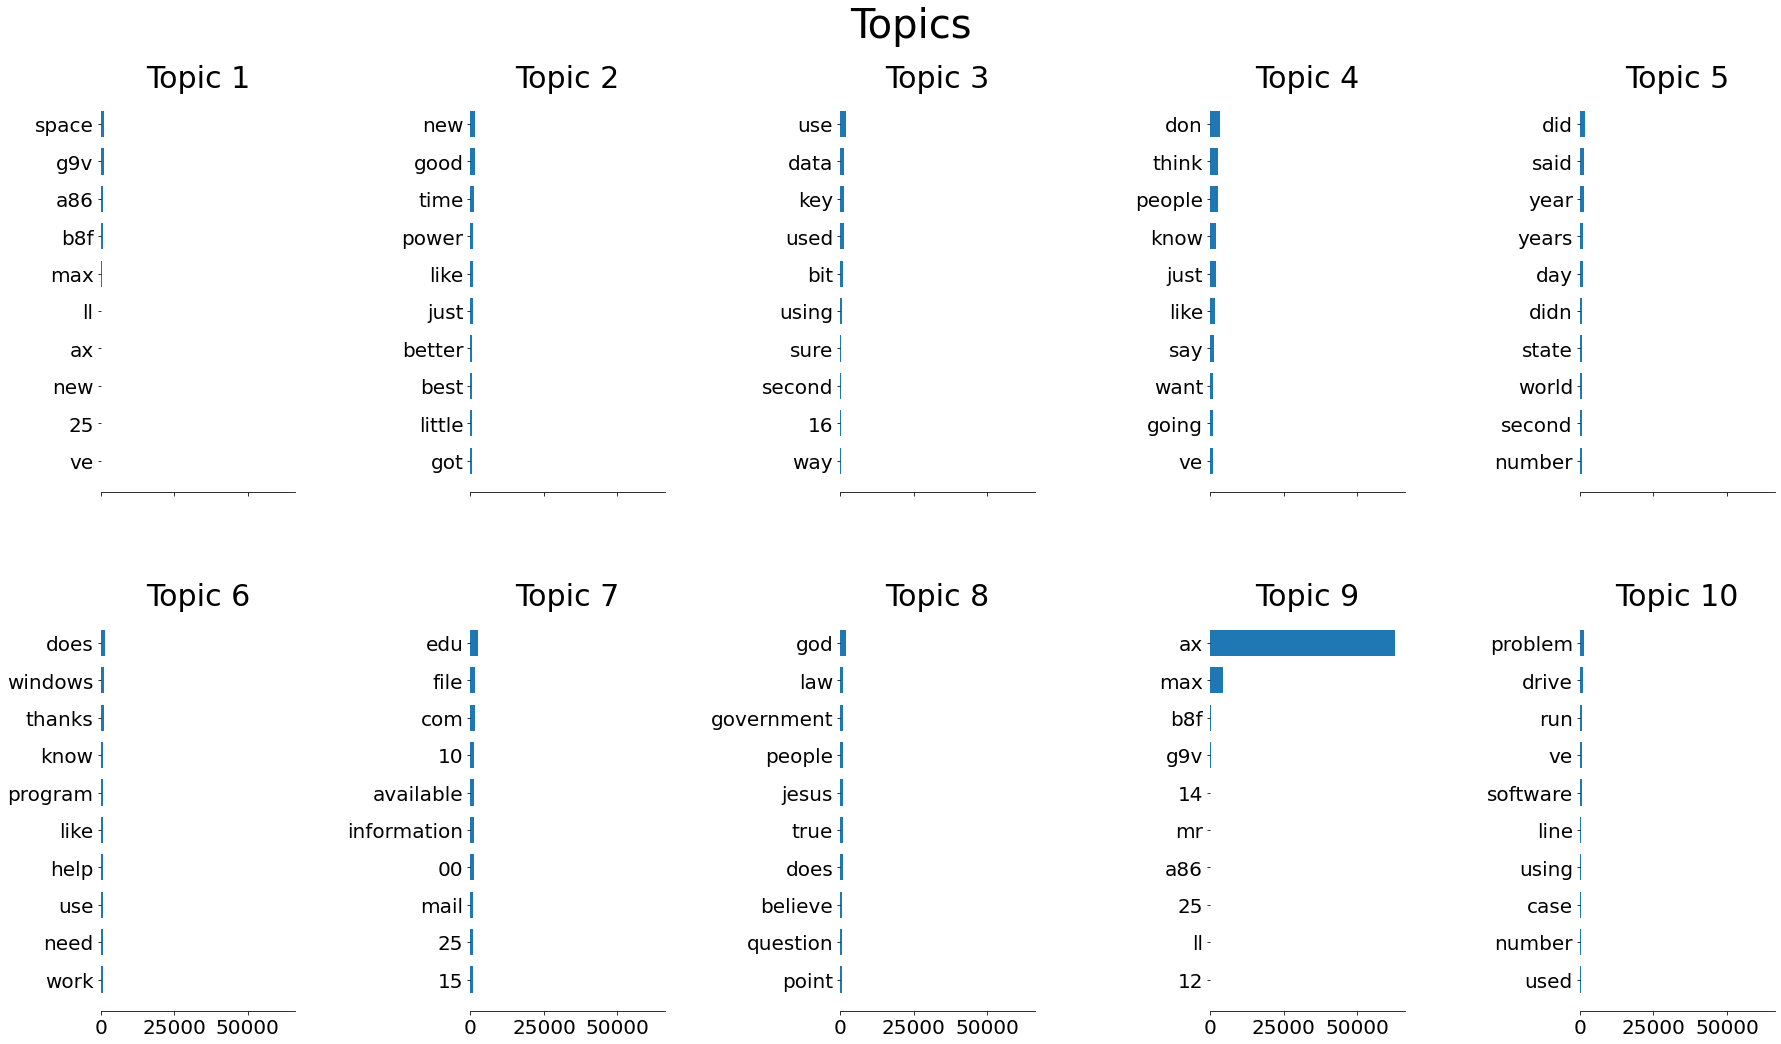

In [46]:
display_topics(lda, cvect_feats, 10, 'Topics')
# needs more cleaning or preprocessing before passing through

### Stretch: Use LDA w/ Gensim to do the same thing.

In [47]:
# see walkthrough for reference 